Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "avdashko"
COLLABORATORS = ""

---

# Вычисление определенных интегралов

## I. Двухточечная квадратура Гаусса

Постройте квадратурную формулу Гаусса, интегрирующую точно многочлены степеней вплоть до третьей на интервале $[a, b]$. Заметим, что для этого достаточно построить _двухточечную_ квадратуру.

Напишите функцию, которая возвращает веса, $w_1$ и $w_2$, и узлы, $x_1$ и $x_2$, двухточечной квадратурной формулы Гаусса с весовой функцией $w(x) = 1$, т.е., интегралы вида

$$
\int_a^b\! f(x)\, dx \approx w_1 f(x_1) + w_2 f(x_2)
$$

In [50]:
import sympy as sp
def gauss_2(a, b):
    r"""Return nodes and weights for a two-point Gauss quadrature on [a, b].
    
    Parameters
    ----------
    a, b : float
       Boundaries of the integration interval
       
    Returns
    -------
    x1, x2, w1, w2 : float
       Nodes and weights of the quadrature.
    """
    # YOUR CODE HERE
    t1, t2 = sp.symbols('t1, t2')
    c1, c2 = sp.symbols('c1, c2')
    f1 = c1 + c2 - 2
    f2 = c1*t1 + c2*t2
    f3 = c1*t1**2 + c2*t2**2 - 2/3
    f4 = c1*t1**3 + c2*t2**3
    u1,u2 = (sp.solvers.solve((f1, f2, f3, f4), (t1, t2, c1,c2)))
    t1,t2,c1,c2=u1
    x1 = (a+b)/2 + (a-b)*float(t1)/2
    x2 = (a+b)/2 + (a-b)*float(t2)/2
    w1 = (b-a)*float(c1)/2
    w2 = (b-a)*float(c2)/2
    return x1, x2, w1, w2

In [51]:
from numpy.testing import assert_allclose

x1, x2, w1, w2 = gauss_2(0, 1)

def f(x, n): 
    return x**n

for n in [0, 1, 2, 3]:
    assert_allclose(w1*f(x1, n=n) + w2*f(x2, n=n),
                    1./(n+1), atol=1e-14)

## II. Вычитание интегрируемых сингулярностей


Вычислите определённый интеграл методом трапеций с вычитанием сингулярности

$$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$$

Вам могут пригодиться значения следующих определенных интегралов:

$$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\pi/2.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.
(5 баллов, защита)

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [37]:
import numpy
import math

def func(x):
    return (math.e ** x - 1 - x - x ** 2 / 2 - math.e * x ** 2 / 2 - math.e/2)/(math.sqrt(x*(1 - x)))

def integ(npts=10):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """
    dx = 0.99999 / (npts - 1)
    sum = 0.5 * (func(0.00001) + func(0.99999))
    for i in range(1, npts - 1):
        sum += func(0.00001 + i * dx)
    res =  sum * dx
    return res
print(integ(10000))

-5.6670279780173525


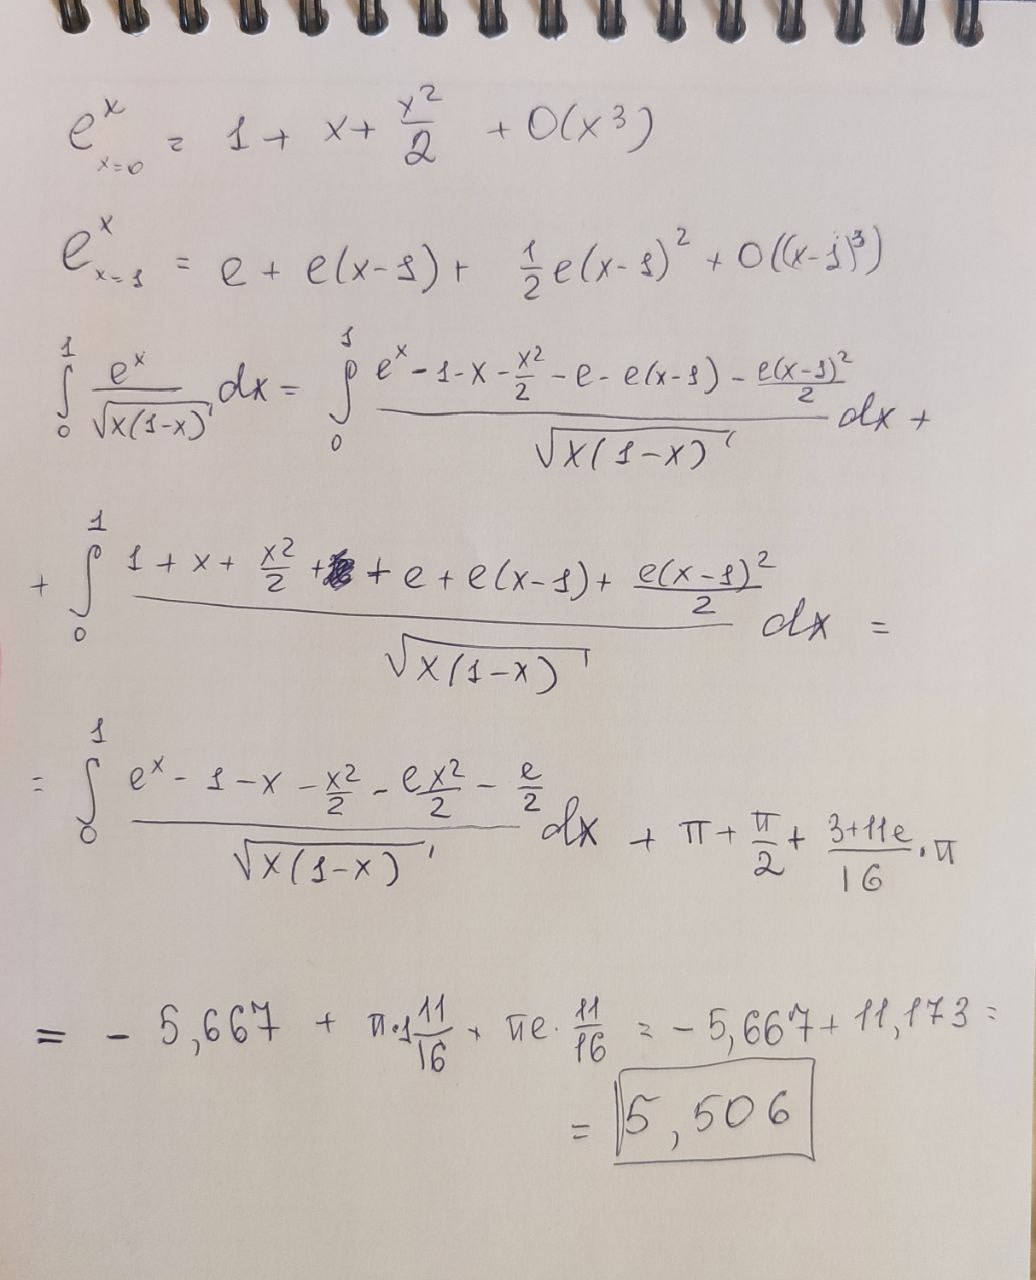

In [39]:
from IPython.display import Image
Image('ph.jpeg')

In [2]:
# this is a test to check your computed value
from numpy.testing import assert_allclose


## III. Интеграл от осциллирующей функции

Рассмотрим определенный интеграл

$$
I = \int_0^\infty\! \frac{\sin(x) \cos{(\cos{(x)})}}{x}\,dx
$$

Вычислите значение данного интеграла с относительной точностью $10^{-6}$. Для упрощения задачи можете воспользоваться функционалом `scipy.integrate.quad`.

Заметим, что "из коробки" интеграл вычислить не удается, и нужно что-то придумать.

In [52]:
from math import sin, cos

from scipy.integrate import quad
quad(lambda x: sin(x) * cos(cos(x)) / x, 0, float('inf'))

<ipython-input-52-5a28b85f551f>:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(lambda x: sin(x) * cos(cos(x)) / x, 0, float('inf'))


(1.9653912540956746, 4.08917428404232)

Напишите функцию, которая возвращает значение данного интеграла. Только само значение интеграла, без оценки погрешности.
(оборачиваем интеграл в функцию только для удобства автопроверки).

In [ ]:
from scipy.integrate import quad

def integ():
    """Return a single float, the computed value of the integral."""
    
    raise NotImplementedError()

In [ ]:
from numpy.testing import assert_allclose

# this is a test cell, keep it intact
